# lifetimes_quick_start
## Ref
https://dataorigami.net/blogs/napkin-folding/18868411-lifetimes-measuring-customer-lifetime-value-in-python?comment=18180669496#comments
- Lifetimes: Measuring Customer Lifetime Value in Python by Cameron Davidson-Pilon 

In [7]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
from lifAetimes.datasets import load_cdnow_summary

In [2]:
data = load_cdnow_summary(index_col=[0])

In [3]:
data.head()

,frequency,recency,T
ID,,,
1,2,30.43,38.86
2,1,1.71,38.86
3,0,0.00,38.86
4,0,0.00,38.86
5,0,0.00,38.86


In [4]:
from lifetimes import BetaGeoFitter

# similar API to scikit-learn and lifelines.
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(data['frequency'], data['recency'], data['T'])
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 2357 subjects, a: 0.79, alpha: 4.41, b: 2.43, r: 0.24>


In [5]:
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.242593,0.012557,0.217981,0.267205
alpha,4.413532,0.378221,3.672218,5.154846
a,0.792886,0.185719,0.428877,1.156895
b,2.425752,0.705345,1.043276,3.808229


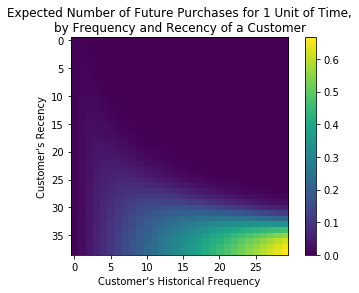

In [8]:
"""
Need to inmportthe following. Otherwise, the figure will not show 
import matplotlib.pyplot as plt 
"""

from lifetimes.plotting import plot_frequency_recency_matrix

plot_frequency_recency_matrix(bgf)

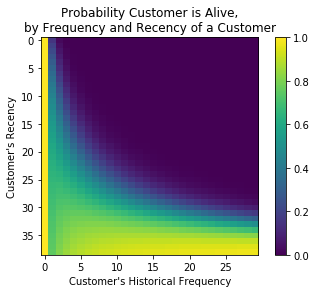

In [9]:
from lifetimes.plotting import plot_probability_alive_matrix
plot_probability_alive_matrix(bgf)

### Ranking customers from best to worst
- Return to our customers and rank them from "highest expected purchases in the next period" to lowest
- Models expose a method that will predict a customer's expected purchases in the next period using their history.

In [10]:
t = 1
data['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, data['frequency'], data['recency'], data['T'])
data.sort_values(by='predicted_purchases').tail(5)

,frequency,recency,T,predicted_purchases
ID,,,,
509,18,35.14,35.86,0.424877
841,19,34.00,34.14,0.474738
1981,17,28.43,28.86,0.486526
157,29,37.71,38.00,0.662396
1516,26,30.86,31.00,0.710623


### Assessing model fit
- Predict and visualize our customers' behaviour, but is our model correct? 
- Assess the model's correctness
  - Compare your data versus artificial data simulated with your fitted model's parameters.

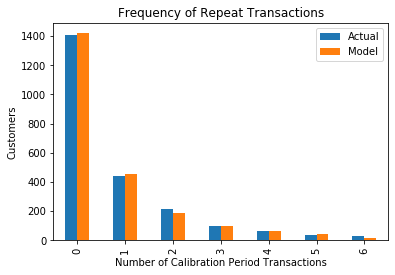

In [11]:
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf)

### Example using transactional datasets
- Most often, the dataset you have at hand will be at the transaction level. 
- Lifetimes has some utility functions to transform that transactional data
  - One row per purchase  into summary data 
    - Frequency, recency and age dataset

In [12]:
from lifetimes.datasets import load_transaction_data
from lifetimes.utils import summary_data_from_transaction_data

transaction_data = load_transaction_data()
print(transaction_data.head())

                  date  id
0  2014-03-08 00:00:00   0
1  2014-05-21 00:00:00   1
2  2014-03-14 00:00:00   2
3  2014-04-09 00:00:00   2
4  2014-05-21 00:00:00   2


In [13]:
transaction_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15273 entries, 0 to 15272
Data columns (total 2 columns):
date    15273 non-null object
id      15273 non-null int64
dtypes: int64(1), object(1)
memory usage: 238.7+ KB


In [14]:
"""
for id = 2
- 7 transactions,  frequency  = 6 (7 -1, remove the first transaction)
The recency = 142 = The last purchased date - The first purchased date = (date(2014,8,3) - = date(2014,3,14 ).dates 
T = age = 292 = the end date - The first purchased date  = (date(2014,12,31) - = date(2014,3,14 ).dates 
   frequency  recency      T
id                           
0         0.0      0.0  298.0
1         0.0      0.0  224.0
2         6.0    142.0  292.0

"""
summary = summary_data_from_transaction_data(transaction_data, 'id', 'date', observation_period_end='2014-12-31')
print(summary.head())

    frequency  recency      T
id                           
0         0.0      0.0  298.0
1         0.0      0.0  224.0
2         6.0    142.0  292.0
3         0.0      0.0  147.0
4         2.0      9.0  183.0


In [16]:
transaction_data.date.max()

'2014-12-31 00:00:00'

In [17]:
transaction_data.date.min()

'2014-01-01 00:00:00'

In [29]:
transaction_data[transaction_data.id == 2]

,date,id
2,2014-03-14 00:00:00,2
3,2014-04-09 00:00:00,2
4,2014-05-21 00:00:00,2
5,2014-06-08 00:00:00,2
6,2014-06-30 00:00:00,2
7,2014-07-31 00:00:00,2
8,2014-08-03 00:00:00,2


In [20]:
import datetime
from datetime import datetime, timedelta, date
import time 


In [22]:
date1 = date(2014,3,14) 
date2 = date(2014,8,3)
(date2-date1).days
#print("Total weeks {} and days {}".format(days//7, days%7))

142

In [23]:
date2 = date(2014,12,31) 
date1 = date(2014,8,3)
(date2-date1).days

150

In [26]:
date2 = date(2014,12,31) 
date1 = date(2014,4,9)
(date2-date1).days

266

In [27]:
date2 = date(2014,12,31) 
date1 = date(2014,3,14)
(date2-date1).days

292

In [28]:
date2 = date(2014,9,1) 
date1 = date(2014,3,14)
(date2-date1).days

171

In [30]:
transaction_data[transaction_data.id == 1]

,date,id
1,2014-05-21 00:00:00,1


In [31]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15273 entries, 0 to 15272
Data columns (total 2 columns):
date    15273 non-null object
id      15273 non-null int64
dtypes: int64(1), object(1)
memory usage: 238.7+ KB


In [36]:
#transaction_data_x = pd.to_datetime(transaction_data[date]).dt.date
transaction_data_x = pd.to_datetime(transaction_data['date'])

In [38]:
transaction_data_x = pd.to_datetime(transaction_data['date']).dt.date

In [39]:
transaction_data_x.head()

0    2014-03-08
1    2014-05-21
2    2014-03-14
3    2014-04-09
4    2014-05-21
Name: date, dtype: object

In [42]:
 transaction_data_x.loc['0']

KeyError: '0'

In [43]:
type(transaction_data_x)

pandas.core.series.Series

In [44]:
transaction_data_x.loc[0]

datetime.date(2014, 3, 8)

In [45]:
( transaction_data_x.loc[0] - transaction_data_x.loc[1]).days

-74

In [46]:
transaction_data.date.loc[0]

'2014-03-08 00:00:00'

In [47]:
type(transaction_data.date.loc[0])

str

In [49]:
transaction_data.shape

(15273, 2)

In [51]:
tx_user = pd.DataFrame(transaction_data.id.unique())

In [53]:
tx_user.shape

(5000, 1)

In [56]:
tx_max_purchase = transaction_data.groupby('id').date.max().reset_index()
tx_max_purchase.columns = ['id','MaxPurchaseDate']
tx_max_purchase['Recency'] = (tx_max_purchase['MaxPurchaseDate'].max() - tx_max_purchase['MaxPurchaseDate']).dt.days

tx_user = pd.merge(tx_user, tx_max_purchase[['id','Recency']], on='id')

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [1]:
from lifetimes.datasets import load_transaction_data
#from lifetimes.utils import summary_data_from_transaction_data

transaction_data = load_transaction_data()
print(transaction_data.head())

                  date  id
0  2014-03-08 00:00:00   0
1  2014-05-21 00:00:00   1
2  2014-03-14 00:00:00   2
3  2014-04-09 00:00:00   2
4  2014-05-21 00:00:00   2
